In [2]:
import os
import wave
import pickle
import pyaudio
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn import preprocessing
from scipy.io.wavfile import read
import python_speech_features as mfcc
from sklearn.mixture import GaussianMixture 

warnings.filterwarnings("ignore")

In [3]:
# function to calculate delta array
def calculate_delta(array):
   
    rows,cols = array.shape
    deltas = np.zeros((rows,20))
    N = 2
    for i in range(rows):
        index = []
        j = 1
        while j <= N:
            if i-j < 0:
              first =0
            else:
              first = i-j
            if i+j > rows-1:
                second = rows-1
            else:
                second = i+j 
            index.append((second,first))
            j+=1
        deltas[i] = ( array[index[0][0]]-array[index[0][1]] + (2 * (array[index[1][0]]-array[index[1][1]])) ) / 10
    return deltas

# extracting mfcc features and combining it with deltas
def extract_features(audio,rate):
       
    mfcc_feature = mfcc.mfcc(audio,rate, 0.025, 0.01,20,nfft = 1200, appendEnergy = True)    
    mfcc_feature = preprocessing.scale(mfcc_feature)
    print(mfcc_feature)
    print(mfcc_feature.shape)
    delta = calculate_delta(mfcc_feature)
    com = np.hstack((mfcc_feature,delta)) 
    return com

[[-1.04003917 -0.54434124 -0.71280722 ... -0.25024612 -0.34803028
  -1.30344478]
 [-1.02992879 -0.3574339  -1.14065949 ...  0.53051394 -1.00551597
  -0.54570735]
 [-0.9729003  -0.50211273 -0.80098198 ... -0.27403042 -0.05366927
  -0.66011218]
 ...
 [-1.21011117 -0.80315322 -0.1846824  ...  0.40288613  1.33883931
   0.04148065]
 [-1.12141012 -0.88370487  0.00787984 ... -0.06710534  0.78826861
  -0.0770861 ]
 [-1.02733245 -0.97327217  0.03141803 ... -0.8806094   0.16001363
  -0.31672909]]
(2627, 20)
[[-3.10354975 -4.6061081   1.93620822 ...  0.20988934 -0.43813054
   0.12912313]
 [-3.08151732 -4.71584946  2.00177486 ... -0.46464215  0.22278372
   0.84460434]
 [-3.04167705 -4.78314634  2.03486009 ... -0.76054716 -0.07083681
   0.41864503]
 ...
 [-1.54631717 -0.66148826  0.65903119 ...  0.73185726 -1.26197504
  -0.88387779]
 [-1.53399934 -0.71788509  0.53674267 ...  0.76493607 -0.47218759
  -0.35567429]
 [-1.52512051 -0.88974526  0.75122042 ...  1.29546292 -0.81005316
  -0.57819044]]
(2619

   1.03681525]]
(1899, 20)
[[-1.79596256 -0.83660019  0.64003855 ...  0.6369835   1.63011405
   0.59307649]
 [-1.77423905 -0.82482251  0.77260993 ...  0.56476464  1.91735228
   0.93832245]
 [-1.78645504 -0.85551818  0.78871796 ...  0.41802619  2.02497125
   0.97943352]
 ...
 [-1.42419609 -0.08235188 -0.12814521 ...  1.13043782 -0.48006418
   0.21245706]
 [-1.56713924 -0.13439865  0.64681426 ...  1.32380983  0.44884261
   0.68264932]
 [-1.70653438 -0.12349917  0.61295396 ...  1.515859    1.10185308
   0.79680154]]
(2592, 20)
[[-1.7032988  -0.76800239  0.74934642 ... -0.98219061 -0.03030498
  -0.10321176]
 [-1.50082852 -0.91003674  0.74760198 ... -1.64417743 -0.998882
   0.0638873 ]
 [-1.45743108 -0.91335879  0.79850985 ... -1.73857998 -0.57746977
   0.70145607]
 ...
 [-1.33753749 -0.33782247  0.4966956  ...  0.01330924  1.24706343
   1.05407505]
 [-1.3917687  -0.26516436  0.28545886 ... -0.42302103  0.4996931
   0.37936246]
 [-1.6085622  -0.42883837  0.40465871 ... -0.55276244 -0.078541

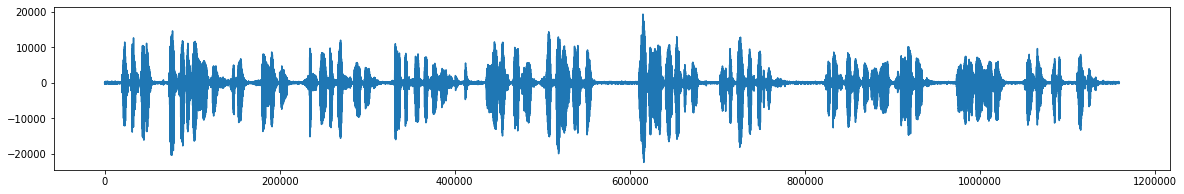

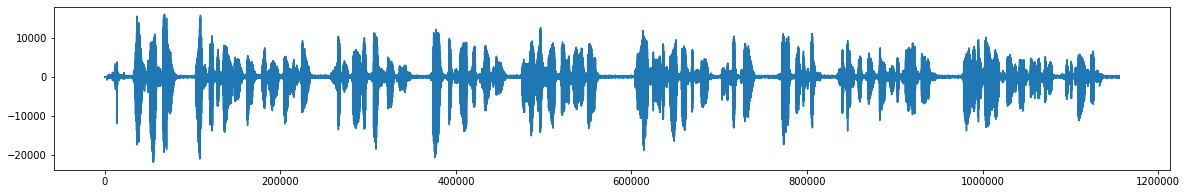

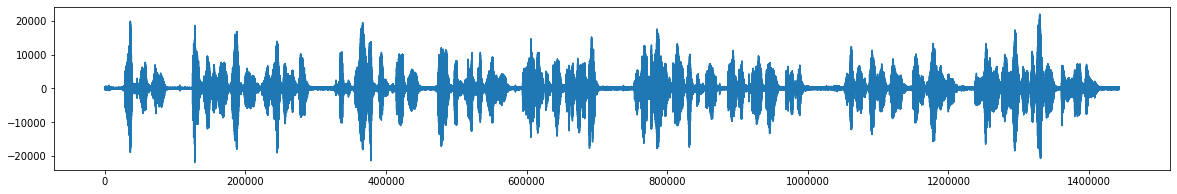

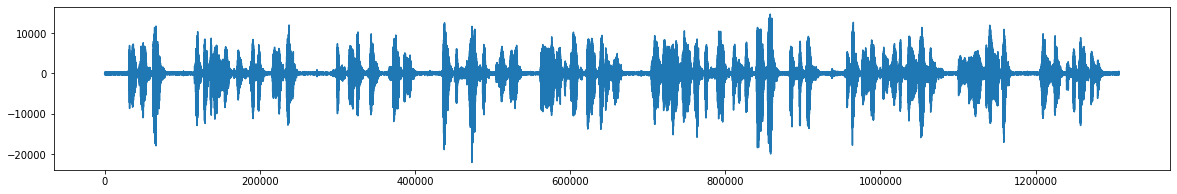

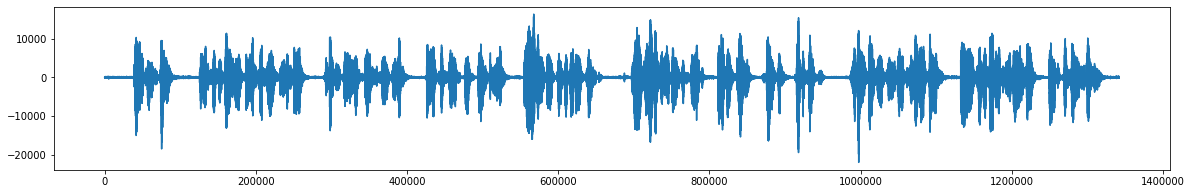

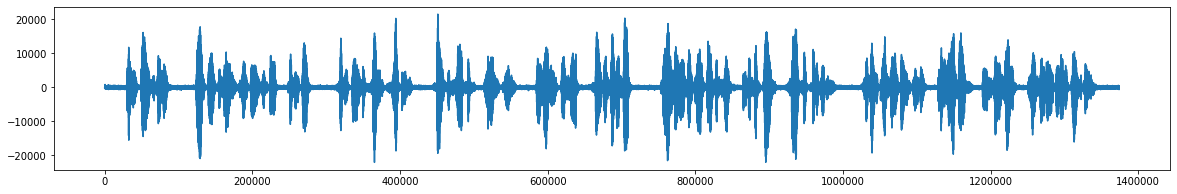

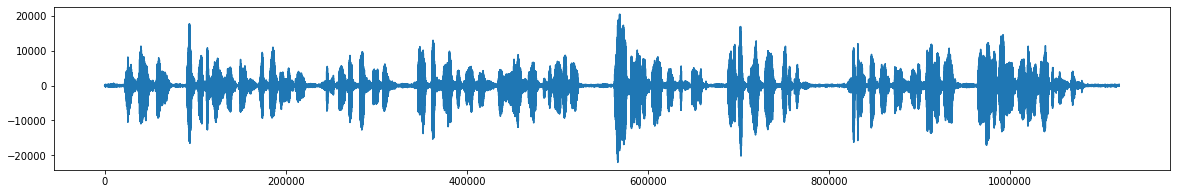

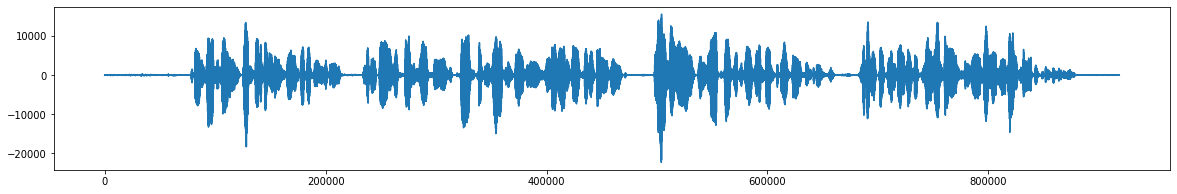

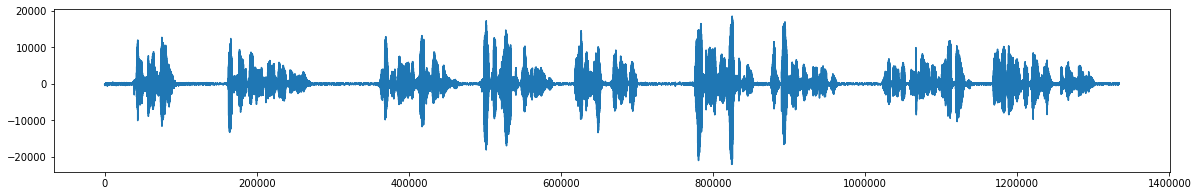

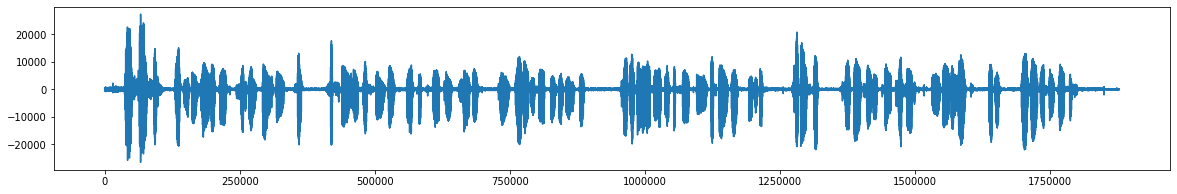

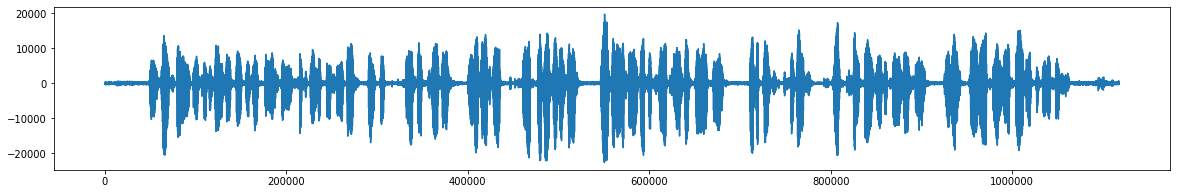

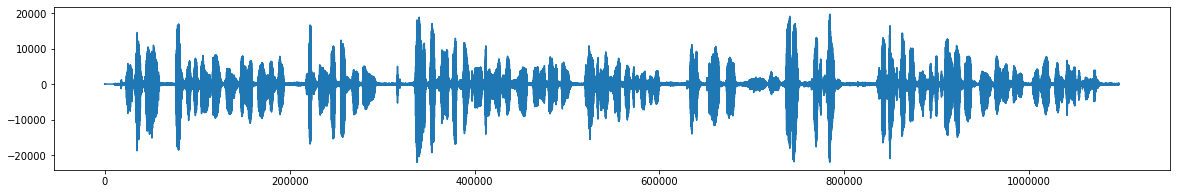

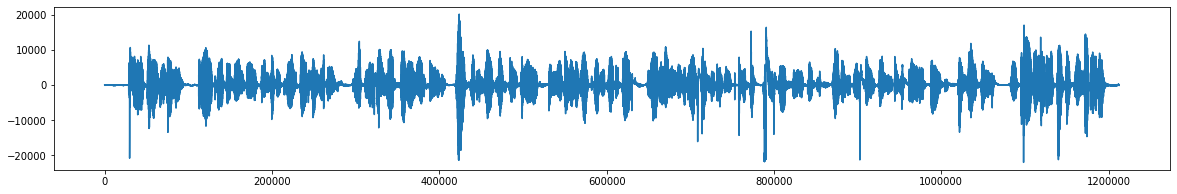

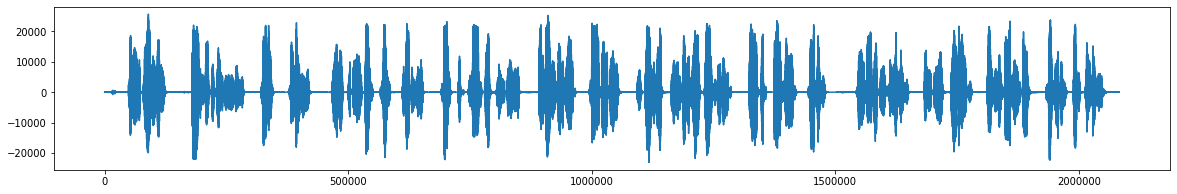

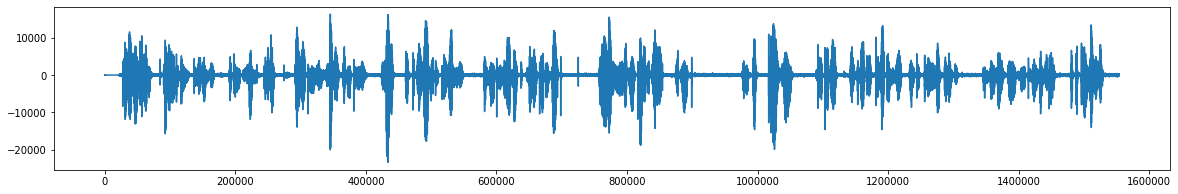

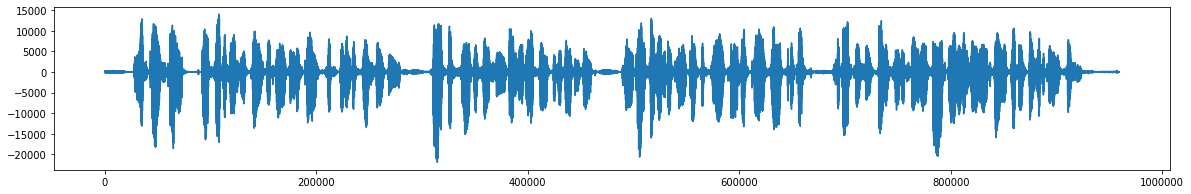

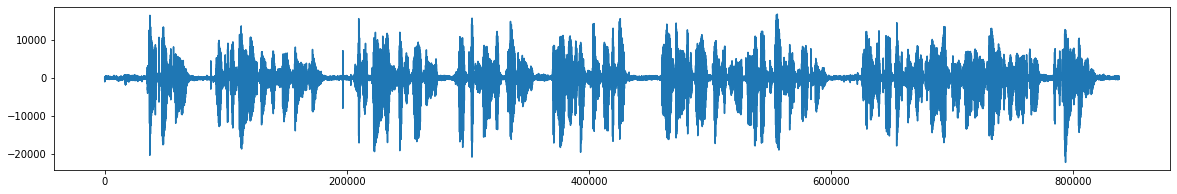

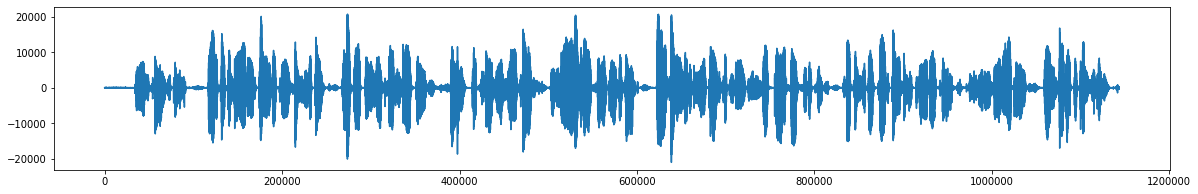

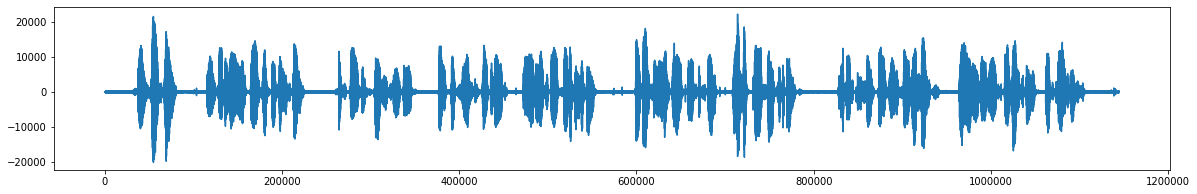

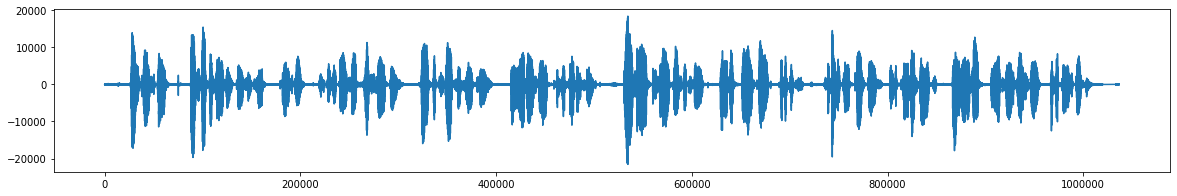

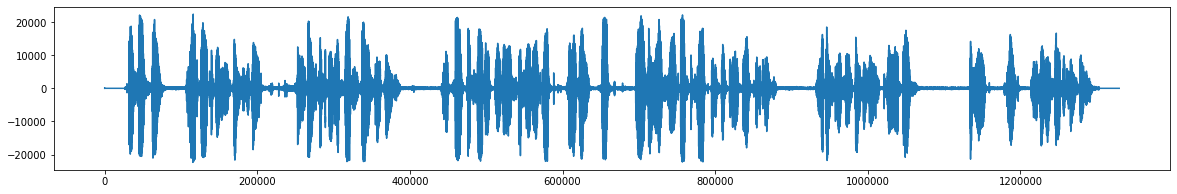

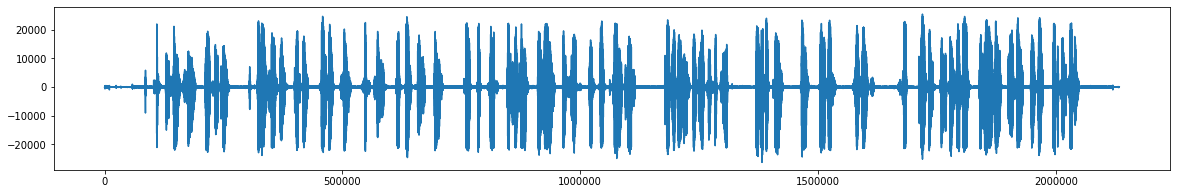

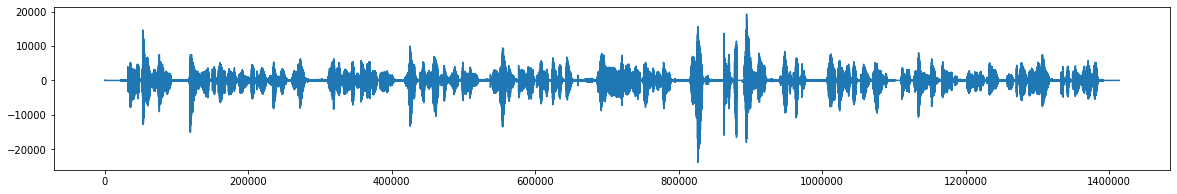

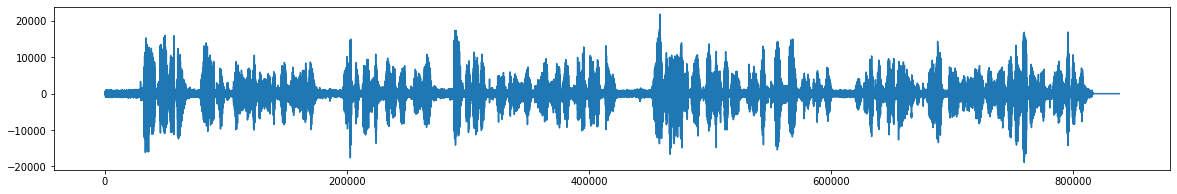

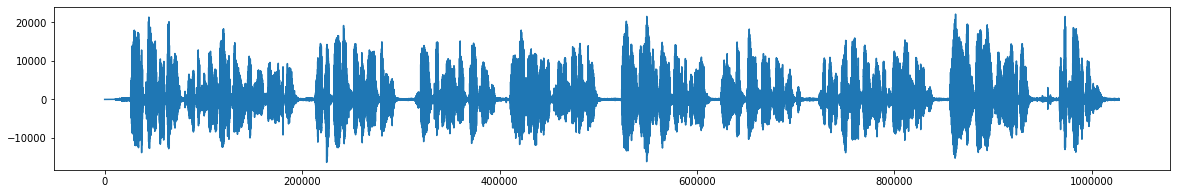

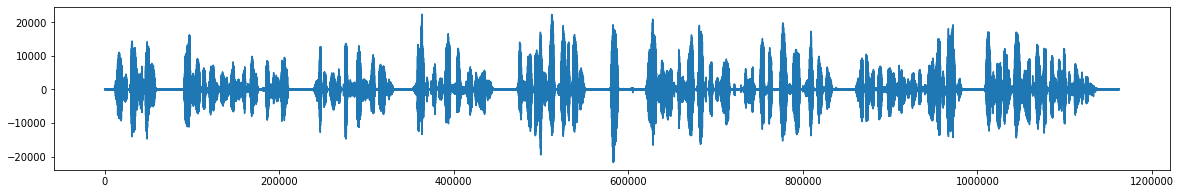

In [7]:


ip_path = "C:/Users/rojit/Desktop/database/accents_database/wave_files/"

# accents used to train the model
folder_names = ['hindi','malayalam','punjabi','tamil','telugu','urdu']

for name in folder_names:
    value = os.listdir(ip_path+name)
    features = np.asarray(())
    c = 1
    l = len(value)
    for fname in value:
        # plotting the audio file of samples
        ra, data = read(ip_path+name+'/'+fname) 
        fig, ax = plt.subplots(figsize=(20,3))
        ax.plot(data)
        
        # extracting features from audio files
        vec = extract_features(data,ra)
        
    
        # stacking the features of samples together as 1 numpy array
        if(np.size(features)==0):
            features = vec
        else:
            features = np.vstack((features, vec))
    
        if c == l:
            # training individual speaker GaussuanMixture models
            gmm = GaussianMixture(n_components = 6, max_iter = 200, covariance_type='diag',n_init = 3)
            gmm.fit(features)
        
            print("Dimentions of features for"+" "+name+".gmm is",features.shape)
        
            # dumping the model for individual features into pickle file
            filename = "C:/Users/rojit/Desktop/database/accents_database/"+"models/"+name+".gmm"
            pickle.dump(gmm, open(filename, 'wb'))
            c = 0
            features = np.asarray(())
            value.clear()
        c += 1

  

[[-3.73938851 -2.79244602 -1.70008412 ... -0.3583954   0.09492791
  -0.54898811]
 [-3.72548683 -2.38507309 -1.2063575  ... -0.16536842  0.26688344
  -0.08166333]
 [-3.72049293 -2.47398984 -1.302061   ...  0.04958503  0.10254219
  -0.29361065]
 ...
 [-0.56053615 -0.06400084 -0.37137689 ... -0.66584753  0.36896358
  -0.71500973]
 [-0.53572873  0.04406131 -0.08272806 ... -1.16462467  0.37492116
  -0.14023493]
 [-0.67177547 -0.01918212 -0.21674725 ... -1.31141444  0.25407654
  -0.49782131]]
(999, 20)
[-24.3487815  -25.02016494 -23.43265376 -23.24506456 -24.34036245
 -21.89877858]
Speaker Nirmala has urdu accent influence
[[-3.43700345 -2.06400811 -1.62463132 ... -0.09881254 -0.19754252
  -0.32738284]
 [-3.42425478 -1.73768598 -1.08998544 ...  0.04930201  0.01902819
   0.20901553]
 [-3.41967509 -1.80891188 -1.19362069 ...  0.21424132 -0.18795265
  -0.03425896]
 ...
 [ 0.02136285 -0.28393854  1.01018128 ...  0.4159076   0.21639514
  -0.07892566]
 [-0.03465289 -0.2120224   0.99563963 ... -0.2

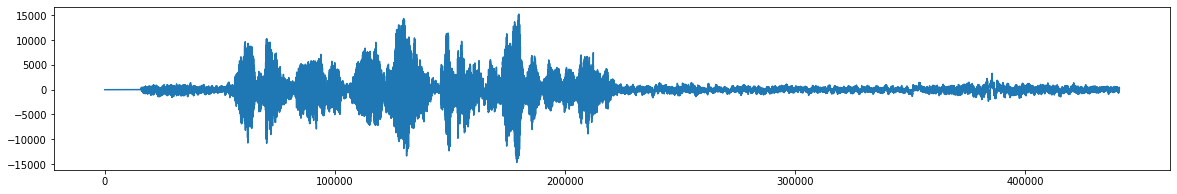

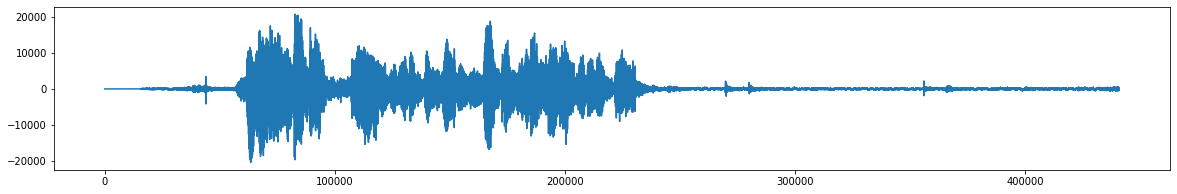

In [4]:
path = "C:/Users/rojit/Desktop/database/accents_database/models/"

gmm_files = os.listdir("C:/Users/rojit/Desktop/database/accents_database/models/")

model = []
for f in gmm_files:
    model.append(pickle.load(open(path+f,'rb')))

accents = [f.split('.')[0] for f in gmm_files]

test = os.listdir('C:/Users/rojit/Desktop/database/accents_database/test_wave_files/')

for p in test:
    ra, data = read('C:/Users/rojit/Desktop/database/accents_database/test_wave_files/'+p) 
    fig, ax = plt.subplots(figsize=(20,3))
    ax.plot(data)
    
    #extract features of test audio
    vec = extract_features(data,ra)
    log_likelihood = np.zeros(len(model))
    
    for i in range(len(model)):
        gmm = model[i]  
        s = np.array(gmm.score(vec))
        log_likelihood[i] = s.sum() #calculate the likelihood of the test audio with that of the different accent models
    print(log_likelihood)
    
    # select the accent with most likelihood
    w = np.argmax(log_likelihood)
    print("Speaker "+p.split('_')[0]+" has "+accents[w]+" accent influence")
        
    
